# Módulo 6:
## El Enfoque Orientado a Objetos: clases, métodos, objetos y sus características estándar: manejo de excepciones y trabajando con archivos.

## 6.8 Procesando archivos

### Accediendo a archivos desde el código en Python

Uno de los problemas más comunes en el trabajo del desarrollador es **procesar datos almacenados en archivos** que generalmente se almacenan físicamente utilizando dispositivos de almacenamiento: discos duros, ópticos, de red o de estado sólido.

Es fácil imaginar un programa que clasifique 20 números, y es igualmente fácil imaginar que el usuario de este programa ingrese estos veinte números directamente desde el teclado. Es mucho más difícil imaginar la misma tarea cuando hay 20,000 números para ordenar, y no existe un solo usuario que pueda ingresar estos números sin cometer un error.

Es mucho más fácil imaginar que estos números se almacenan en el archivo que lee el programa. El programa clasifica los números y no los envía a la pantalla, sino que crea un nuevo archivo y guarda la secuencia ordenada de números allí.

Si queremos implementar una base de datos simple, la única forma de almacenar la información entre ejecuciones del programa es guardarla en un archivo (o archivos si tu base de datos es más compleja).

Es un principio que cualquier problema de programación no simple se basa en el uso de archivos, ya sea que procese imágenes (almacenadas en archivos), multiplique matrices (almacenadas en archivos) o calcule salarios e impuestos (lectura de datos almacenados en archivos).

Puedes preguntarte por qué hemos esperado hasta ahora para mostrarte esto. La respuesta es muy simple: la forma en que Python accede y procesa los archivos se implementa utilizando un conjunto consistente de objetos. No hay mejor momento para hablar de esto.


### Nombres de archivos

Los diferentes sistemas operativos pueden tratar a los archivos de diferentes maneras. Por ejemplo, Windows usa una convención de nomenclatura diferente a la adoptada en los sistemas Unix/Linux.

Si utilizamos la noción de un nombre de archivo canónico (un nombre que define de forma exclusiva la ubicación del archivo, independientemente de su nivel en el árbol de directorios), podemos darnos cuenta de que estos nombres se ven diferentes en Windows y en Unix/Linux:

Windows: 
`C:\directory\files`

Linux:
`/directoryfiles`

Como puedes ver, los sistemas derivados de Unix/Linux no usan la letra de la unidad de disco, e.g., `C:` y todos los directorios crecen desde un directorio raíz llamado `/`, mientras que los sistemas Windows reconocen el directorio raíz como `\`.

Además, los nombres de archivo de sistemas Unix/Linux distinguen entre mayúsculas y minúsculas. Los sistemas Windows almacenan mayúsculas y minúsculas en el nombre del archivo, pero no distinguen entre ellas. Esto significa que estas dos cadenas:

`EsteEsElNombreDelArchivo` y `esteeselnombredelarchivo`

describen dos archivos diferentes en sistemas Unix/Linux, pero tienen el mismo nombre para un solo archivo en sistemas Windows.

La diferencia principal y más llamativa es que debes usar **dos separadores diferentes para los nombres de directorio**: `\` en Windows y `/` en Unix/Linux. Esta diferencia no **es muy importante para el usuario normal, pero es muy importante al escribir programas en Python**. Para entender por qué, intenta recordar el papel muy específico que desempeña `\` dentro de las cadenas en Python.

Supongamos que estás interesado en un archivo en particular ubicado en el directorio `dir`, y con el nombre de `archivo`. Supongamos también que deseas asignar a una cadena el nombre del archivo. 

En sistemas Unix/Linux, se ve de la siguiente manera:

`nombre = "/dir/archivo"`

Pero si intentas codificarlo para el sistema Windows:

`nombre = "\dir\archivo"`

obtendrás una sorpresa desagradable: Python generará un error o la ejecución del programa se comportará de manera extraña, como si el nombre del archivo se hubiera distorsionado de alguna manera.

De hecho, no es extraño en lo absoluto, pero es bastante obvio y natural. Python usa la `\` como un caracter de escape (como `\n`). Esto significa que los nombres de archivo de Windows deben escribirse de la siguiente manera:

`nombre = "\\dir\\archivo"`

Afortunadamente, también hay una solución más. Python es lo suficientemente inteligente como para poder convertir diagonales en diagonales invertidas cada vez que descubre que el sistema operativo lo requiere. Esto significa que cualquiera de las siguientes asignaciones:

`nombre = "/dir/archivo"
nombre = "c:/dir/archivo"`

funcionará también con Windows. Cualquier programa escrito en Python (y no solo en Python, porque esa convención se aplica a prácticamente todos los lenguajes de programación) no se comunica con los archivos directamente, sino a través de algunas entidades abstractas que se nombran de manera diferente en los distintos lenguajes o entornos, los términos más utilizados son **handles (un tipo de puntero inteligente) o streams (una especie de canal)** (los usaremos como sinónimos aquí).

El programador, que tiene un conjunto de funciones y métodos, puede realizar ciertas operaciones en el stream, que afectan los archivos reales utilizando mecanismos contenidos en el núcleo del sistema operativo. De esta forma, puedes implementar el proceso de acceso a cualquier archivo, incluso cuando el nombre del archivo es desconocido al momento de escribir el programa.

Las operaciones realizadas con el stream abstracto reflejan las actividades relacionadas con el archivo físico. Para conectar (vincular) el stream con el archivo, es necesario realizar una operación explícita. La operación de conectar un stream con un archivo es llamada **abrir el archivo**, mientras que desconectar el enlace se denomina **cerrar el archivo**.

Por lo tanto, la conclusión es que la primera operación realizada en el stream es siempre `open` y la ultima es `close`. El programa, en efecto, es libre de manipular el stream entre estos dos eventos y manejar el archivo asociado.

Esta libertad está limitada por las características físicas del archivo y la forma en que se abrió el archivo. Digamos nuevamente que la apertura del stream puede fallar, y puede ocurrir debido a varias razones: la más común es la falta de un archivo con un nombre específico.

También puede suceder que el archivo físico exista, pero el programa no puede abrirlo. También existe el riesgo de que el programa haya abierto demasiados streams, y el sistema operativo específico puede no permitir la apertura simultánea de más de `n` archivos (por ejemplo, 200). Un programa bien escrito debe detectar estas aperturas fallidas y reaccionar en consecuencia.

### Streams para Archivos

La apertura del stream no solo está asociada con el archivo, sino que también se debe declarar la manera en que se procesará el stream. Esta declaración se llama un **open mode** (modo abierto).

Si la apertura es exitosa, **el programa solo podrá realizar las operaciones que sean consistentes con el modo abierto declarado**. Hay dos operaciones básicas a realizar con el stream:

- **Lectura** del stream: las porciones de los datos se recuperan del archivo y se colocan en un área de memoria administrada por el programa (por ejemplo, una variable).
- **Escritura** del stream: Las porciones de los datos de la memoria (por ejemplo, una variable) se transfieren al archivo.

Hay tres modos básicos utilizados para abrir un stream:

- **Modo Lectura**: un stream abierto en este modo permite **solo operaciones de lectura**; intentar escribir en la transmisión provocará una excepción (la excepción se llama `UnsupportedOperation`, la cual hereda el `OSError` y el `ValueError`, y proviene del módulo `io`).
- **Modo Escritura**: un stream abierto en este modo permite **solo operaciones de escritura**; intentar leer el stream provocará la excepción mencionada anteriormente.
- **Modo Actualizar**: un stream abierto en este modo permite **tanto lectura como escritura**.

Antes de discutir cómo manipular los streams, te debemos una explicación. **El stream se comporta casi como una grabadora**. Cuando lees algo de un stream, un cabezal virtual se mueve sobre la transmisión de acuerdo con el número de bytes transferidos desde el stream. Cuando escribes algo en el stream el mismo cabezal se mueve a lo largo del stream registrando los datos de la memoria.

Siempre que hablemos de leer y escribir en el stream, trata de imaginar esta analogía. Los libros de programación se refieren a este mecanismo como la **posición actual del archivo**, aquí también usaremos este término.

Ahora es necesario mostrarte el objeto responsable de representar los streams en los programas.

### Manejo de Archivos

Python supone que **cada archivo está oculto detrás de un objeto de una clase adecuada**. Por supuesto, es difícil no preguntar cómo interpretar la palabra *adecuada*.

Los archivos se pueden procesar de muchas maneras diferentes: algunos dependen del contenido del archivo, otros de las intenciones del programador.

En cualquier caso, diferentes archivos pueden requerir diferentes conjuntos de operaciones y comportarse de diferentes maneras. Un objeto de una clase adecuada es **creado cuando abres el archivo y lo aniquilas al momento de cerrarlo**.

Entre estos dos eventos, puedes usar el objeto para especificar qué operaciones se deben realizar en un stream en particular. Las operaciones que puedes usar están impuestas por **la forma en que abriste el archivo**.

En general, el objeto proviene de una de las clases que se muestran aquí:

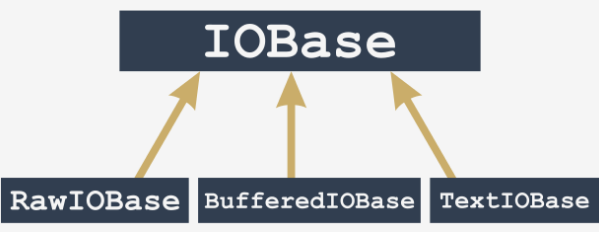


N.B.: nunca se utiliza el constructor para dar vida a estos objetos. La unica forma de **obtenerlos es invocar la función llamada** `open()`. La función analiza los argumentos proporcionados y crea automáticamente el objeto requerido. Si deseas **deshacerte del objeto, invoca el método denominado** `close()`.

La invocación cortará la conexión con el objeto y el archivo, y eliminará el objeto. Para nuestros propósitos, solo nos ocuparemos de los streams representados por los objetos `BufferIOBase` y `TextIOBase`. Entenderás por qué pronto.

Debido al tipo de contenido de los streams, **todos se dividen en tipo texto y binario**.

Los streams de texto están estructurados en líneas; es decir, contienen caracteres tipográficos (letras, dígitos, signos de puntuación, etc.) dispuestos en filas (líneas), como se ve a simple vista cuando se mira el contenido del archivo en el editor. Este tipo de archivo es escrito (o leído) principalmente carácter por carácter, o línea por línea.

Los streams binarios no contienen texto, sino una secuencia de bytes de cualquier valor. Esta secuencia puede ser, por ejemplo, un programa ejecutable, una imagen, un audio o un videoclip, un archivo de base de datos, etc.

Debido a que estos archivos no contienen líneas, las lecturas y escrituras se relacionan con porciones de datos de cualquier tamaño. Por lo tanto, los datos se leen y escriben byte a byte, o bloque a bloque, donde el tamaño del bloque generalmente varía de uno a un valor elegido arbitrariamente.

Ahora viene un problema pequeño. En los sistemas Unix/Linux, los extremos de la línea están marcados por un solo carácter llamado `LF` (código ASCII 10) designado en los programas de Python como `\n`. Otros sistemas operativos, especialmente los derivados del sistema prehistórico CP/M (que también aplica a los sistemas de la familia Windows) utilizan una convención diferente: el final de la línea está marcada por un par de caracteres, `CR` y `LF` (códigos ASCII 13 y 10) los cuales se puede codificar como `\r\n`.

Esta ambigüedad puede causar varias consecuencias desagradables. Si creas un programa responsable de procesar un archivo de texto y está escrito para Windows, puedes reconocer los extremos de las líneas al encontrar los caracteres `\r\n`, pero si el mismo programa se ejecuta en un entorno Unix/Linux será completamente inútil, y viceversa: el programa escrito para sistemas Unix/Linux podría ser inútil en Windows.

Estas características indeseables del programa, que impiden o dificultan el uso del programa en diferentes entornos, se denomina **falta de portabilidad**. Del mismo modo, el rasgo del programa que permite la ejecución en diferentes entornos se llama **portabilidad**. Un programa dotado de tal rasgo se llama **programa portable**.

Dado que los problemas de portabilidad eran (y siguen siendo) muy graves, se tomó la decisión de resolver definitivamente el problema de una manera que no atraiga mucho la atención del desarrollador.

Se realizó a nivel de clases, que son responsables de leer y escribir caracteres hacia y desde el stream. Funciona de la siguiente manera:

- Cuando el stream está abierto y se recomienda que los datos en el archivo asociado se procesen como texto (o no existe tal aviso), se **cambia al modo texto**.

- Durante la lectura y escritura de líneas desde y hacia el archivo asociado, no ocurre nada especial en el entorno Unix, pero cuando se realizan las mismas operaciones en el entorno Windows, un proceso llamado **traducción de caracteres de nueva línea** ocurre: cuando lees una línea del archivo, cada par de caracteres `\r\n` se reemplaza con un solo caracter `\n`, y viceversa; durante las operaciones de escritura, cada caracter `\n` se reemplaza con un par de caracteres `\r\n`.

- El mecanismo es completamente **transparente** para el programa, el cual puede escribirse como si estuviera destinado a procesar archivos de texto Unix/Linux solamente; el código fuente ejecutado en un entorno Windows también funcionará correctamente.

- Cuando el stream está abierto, su contenido se toma tal cual es, **sin ninguna conversión** - no se agregan, ni se omiten bytes.


### Abriendo los streams

El **abrir un stream** se realiza mediante una función que se puede invocar de la siguiente manera:

`stream = open(file, mode = 'r', encoding = None)`

Vamos a analizarlo:

- El nombre de la función (`open`) habla por si mismo; si la apertura es exitosa, la función devuelve un objeto stream; de lo contrario, se genera una excepción (por ejemplo, `FileNotFoundError` **si el archivo que vas a leer no existe**).
- El primer parámetro de la función (`file`) especifica el nombre del archivo que se asociará al stream.
- El segundo parámetro (`mode`) especifica el modo de apertura utilizado para el stream; es una cadena llena de una secuencia de caracteres, y cada uno de ellos tiene su propio significado especial (más detalles pronto).
- El tercer parámetro (`encoding`) especifica el tipo de codificación (por ejemplo, UTF-8 cuando se trabaja con archivos de texto).
- La apertura debe ser la primera operación realizada en el stream.

N.B.: el modo y los argumentos de codificación pueden omitirse; en dado caso, se tomarán sus valores predeterminados. El modo de apertura predeterminado es leer en modo de texto, mientras que la codificación predeterminada depende de la plataforma utilizada.

Permítenos ahora presentarte los modos de apertura más importantes y útiles. ¿Listo?

### Abriendo los streams: modos

Modo de apertura `r`: lectura

- El stream será abierto en **modo lectura**.
- El archivo asociado con el stream **debe existir** y tiene que ser legible, de lo contrario la función `open()` lanzará una excepción.

Modo de apertura `w`: escritura

- El stream será abierto en **modo escritura**.
- El archivo asociado con el stream **no necesita existir**. Si no existe, se creará; si existe, se truncará a la longitud de cero (se borrá); si la creación no es posible (por ejemplo, debido a los permisos del sistema) la función `open()` lanzará una excepción.

Modo de apertura `a`: adjuntar

- El stream será abierto en **modo adjuntar**.
- El archivo asociado con el stream **no necesita existir**; si no existe, se creará; si existe, el cabezal de grabación virtual se establecerá al final del archivo (el contenido anterior del archivo permanece intacto).

Modo de apertura `r+`: leer y actualizar

- El stream será abierto en **modo leer y actualizar**.
- El archivo asociado con el stream **debe existir y tiene que ser escribible**, de lo contrario la función `open()` lanzará una excepción.
- Se permiten operaciones de lectura y escritura en el stream.

Modo de apertura `w+`: escribir y actualizar

- El stream será abierto en **modo escribir y actualizar**.
- El archivo asociado con el stream **no necesita existir**; si no existe, se creará; el contenido anterior del archivo permanece intacto.
- Se permiten operaciones de lectura y escritura en el stream.

### Seleccionando modo de texto y modo binario

Si hay una letra `b` al final de la cadena del modo significa que el stream se debe abrir en el **modo binario**. Si la cadena del modo termina con una letra `t` el stream es abierto en **modo texto**. El modo texto es el comportamiento predeterminado que se utiliza cuando no se especifica ya sea modo binario o texto.

Finalmente, la apertura exitosa del archivo establecerá la posición actual del archivo (el cabezal virtual de lectura/escritura) antes del primer byte del archivo **si el modo no es** `a` y después del último byte del archivo **si el modo es** `a`.



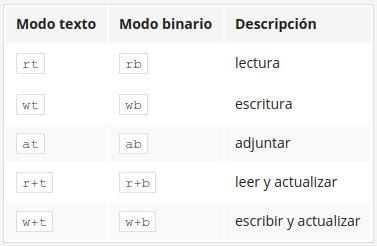

También puedes abrir un archivo para su creación exclusiva. Puedes hacer esto usando el modo de apertura `x`. Si el archivo ya existe, la función `open()` lanzará una excepción.

### Abriendo el stream por primera vez

Imagina que queremos desarrollar un programa que lea el contenido del archivo de texto llamado: `file.txt`. ¿Cómo abrir ese archivo para leerlo? Aquí está el fragmento del código:



In [ ]:
try:
    stream = open("file.txt", "rt")
    # aqui se procesa el archivo
    stream.close()
except Exception as exc:
    print("No se puede abrir el archivo:", exc)

No se puede abrir el archivo: [Errno 2] No such file or directory: 'c.cpp'


¿Que está pasando aqui?

- Hemos abierto el bloque try-except ya que queremos manejar los errores de tiempo de ejecución suavemente.
- Se emplea la función `open()` para intentar abrir el archivo especificado (ten en cuenta la forma en que hemos especificado el nombre del archivo).
- El modo de apertura se define como texto para leer (como **texto es la configuración predeterminada**, podemos omitir la `t` en la cadena de modo).
- En caso de éxito obtenemos un objeto de la función `open()` y lo asignamos a la variable del stream.
- Si `open()` falla, manejamos la excepción imprimiendo la información completa del error (es bueno saber qué sucedió exactamente).

### Streams pre-abiertos

Dijimos anteriormente que cualquier operación del stream debe estar precedida por la invocación de la función `open()`. Hay tres excepciones bien definidas a esta regla.

Cuando comienza nuestro programa, los tres streams ya están abiertos y no requieren ninguna preparación adicional. Además, tu programa puede usar estos streams explícitamente si tienes cuidado de importar el módulo `sys`: `import sys`

Porque ahí es donde se coloca la declaración de estos streams. Vamos a analizarlos:

- `sys.stdin`
 - `stdin` (significa entrada estándar).
 -El stream `stdin` normalmente se asocia con el teclado, se abre previamente para la lectura y se considera como la fuente de datos principal para los programas en ejecución.
 -La función bien conocida `input()` lee datos de stdin por defecto.

- `sys.stdout`
 - stdout (significa salida estándar).
 -El stream stdout normalmente está asociado con la pantalla, preabierta para escritura, considerada como el objetivo principal para la salida de datos por el programa en ejecución.
 -La función bien conocida `print()` envía los datos al stream stdout.

- `sys.stderr`
 - `stderr` (significa salida de error estándar).
 - El stream `stderr` normalmente está asociado con la pantalla, preabierta para escribir, considerada como el lugar principal donde el programa en ejecución debe enviar información sobre los errores encontrados durante su trabajo.
 -No hemos presentado ningún método para enviar datos a este stream (lo haremos pronto, lo prometemos).
 -La separación de `stdout` (resultados útiles producidos por el programa) de `stderr` (mensajes de error, indudablemente útiles pero no proporcionan resultados) ofrece la posibilidad de redirigir estos dos tipos de información a los diferentes objetivos. Una discusión más extensa sobre este tema está más allá del alcance de nuestro curso. El manual del sistema operativo proporcionará más información sobre estos temas.




### Cerrando streams

La última operación realizada en un stream (esto no incluye a los streams `stdin`, `stdout`, y `stderr` pues no lo requieren) debe ser **cerrarlo**.

Esa acción se realiza mediante un método invocado desde dentro del objeto del stream: `stream.close()`.

- El nombre de la función es fácil de entender `close()`, es decir cerrar.
- La función no espera argumentos; el stream no necesita estar abierto.
- La función no devuelve nada pero lanza una excepción `IOError` en caso de un error.
- La mayoría de los desarrolladores creen que la función `close()` siempre tiene éxito y, por lo tanto, no hay necesidad de verificar si ha realizado su tarea correctamente. Esta creencia está solo parcialmente justificada. Si el stream se abrió para escribir y luego se realizó una serie de operaciones de escritura, puede ocurrir que los datos enviados al stream aún no se hayan transferido al dispositivo físico (debido a los mecanismos de **cache** o **buffer**). Dado que el cierre del stream obliga a los búferes a descargarse, es posible que dichas descargas fallen y, por lo tanto, `close()` falle también.

Ya hemos mencionado fallas causadas por funciones que operan con los streams, pero no mencionamos nada sobre cómo podemos identificar exactamente la causa de la falla. La posibilidad de hacer un diagnóstico existe y es proporcionada por uno de los componentes de excepción de los streams.

### Diagnosticando problemas con los streams

El objeto `IOError` está equipado con una propiedad llamada `errno` (el nombre viene de la frase *error number*, número de error) y puedes accederla de la siguiente manera:



In [ ]:
try:
    # operaciones con streams
except IOError as exc:
    print(exc.errno)

IndentationError: ignored

El valor del atributo `errno` se puede comparar con una de las constantes simbólicas predefinidas en módulo `errno`. Echemos un vistazo a algunas **constantes seleccionadas útiles para detectar errores de flujo**:

- `errno.EACCES` → Permiso denegado

 El error se produce cuando intentas, por ejemplo, abrir un archivo con atributos de solo lectura para abrirlo.

- `errno.EBADF` → Número de archivo incorrecto

 El error se produce cuando intentas, por ejemplo, operar un stream sin abrirlo.

- `errno.EEXIST` → Archivo existente

 El error se produce cuando intentas, por ejemplo, cambiar el nombre de un archivo con su nombre anterior.

- `errno.EFBIG` → Archivo demasiado grande

 El error ocurre cuando intentas crear un archivo que es más grande que el máximo permitido por el sistema operativo.

- `errno.EISDIR` → Es un directorio

 El error se produce cuando intentas tratar un nombre de directorio como el nombre de un archivo ordinario.

- `errno.EMFILE` → Demasiados archivos abiertos

 El error se produce cuando intentas abrir simultáneamente más streams de los aceptables para el sistema operativo.

- `errno.ENOENT` → El archivo o directorio no existe

 El error se produce cuando intentas acceder a un archivo o directorio inexistente.

- `errno.ENOSPC` → no queda espacio en el dispositivo

 El error ocurre cuando no hay espacio libre en el dispositivo. 

La lista completa es mucho más larga (incluye también algunos códigos de error no relacionados con el procesamiento del stream). Si eres un programador muy cuidadoso, puedes sentir la necesidad de usar una secuencia de sentencias similar a la que se presenta a continuación:

In [ ]:
import errno
try:
    s = open("file.txt", "rt")
    # el procesamiento va aquí
    s.close()
except Exception as exc:
    if exc.errno == errno.ENOENT:
        print("El archivo no existe.")
    elif exc.errno == errno.EMFILE:
        print("Has abierto demasiados archivos.")
    else:
        printf("El número de error es:", exc.errno)

El archivo no existe.


Afortunadamente, existe una función que puede **simplificar el código de manejo de errores**. Su nombre es `strerror()`, y proviene del módulo `os` y **espera solo un argumento: un número de error**. Su función es simple: proporciona un número de error y una cadena que describe el significado del error.

N.B.: Si pasas un código de error inexistente (un número que no está vinculado a ningún error real), la función lanzará una excepción `ValueError`. Ahora podemos simplificar nuestro código de la siguiente manera:

In [ ]:
from os import strerror
try:
    s = open("file.txt", "rt")
    # el procesamiento va aquí
    s.close()
except Exception as exc:
    print("El archivo no se pudo abrir:", strerror(exc.errno));

El archivo no se pudo abrir: No such file or directory


Ahora es el momento de tratar con archivos de texto y familiarizarse con algunas técnicas básicas que puedes utilizar para procesarlos.



## 6.9 Trabajando con archivos reales

### Procesamiento de archivos de texto

En esta lección vamos a preparar un archivo de texto simple con contenido breve y simple. Te mostraremos algunas técnicas básicas que puedes utilizar para leer el contenido del archivo para poder procesarlo.

El procesamiento será muy simple: vas a copiar el contenido del archivo a la consola y contarás todos los caracteres que el programa ha leído.

Pero recuerda: nuestra comprensión de un archivo de texto es muy estricta. Es un archivo de texto sin formato: puede contener solo texto, sin decoraciones adicionales (formato, diferentes fuentes, etc.)

Es por eso que debes evitar crear el archivo utilizando un procesador de texto avanzado como MS Word, LibreOffice Writer o algo así. Utiliza los conceptos básicos que ofrece tu sistema operativo: Bloc de notas, vim, gedit, etc.

Si tus archivos de texto contienen algunos caracteres nacionales no cubiertos por el juego de caracteres ASCII estándar, es posible que necesites un paso adicional. La invocación de tu función `open()` puede requerir un argumento que denote una codificación específica del texto.

Por ejemplo, si estás utilizando un sistema operativo Unix/Linux configurado para usar UTF-8 como una configuración de todo el sistema, la función `open()` puede verse de la siguiente manera:

In [ ]:
stream = open("c.cpp", "rt", encoding = "utf-8") # se abre el archivo tzop.txt en modo lectura, devolviéndolo como un objeto de archivo
print(stream.read()) # se imprime el contenido del archivo

FileNotFoundError: ignored

Donde el argumento de codificación debe establecerse en un valor dentro de una cadena que representa la codificación de texto adecuada (UTF-8, en este caso). Consulta la documentación de tu sistema operativo para encontrar el nombre de codificación adecuado para tu entorno.

La lectura del contenido de un archivo de texto se puede realizar utilizando diferentes métodos; ninguno de ellos es mejor o peor que otro. Depende de ti cuál de ellos prefieres y te gusta. Algunos de ellos serán a veces más prácticos y otros más problemáticos. Sé flexible. No tengas miedo de cambiar tus preferencias.


####`read()`


El más básico de estos métodos es el que ofrece la función `read()`, la cual pudiste ver en acción en la lección anterior. Si se aplica a un archivo de texto, la función es capaz de:

- Leer un número determinado de caracteres (incluso solo uno) del archivo y devolverlos como una cadena.
- Leer todo el contenido del archivo y devolverlo como una cadena.
- Si no hay nada más que leer (el cabezal de lectura virtual llega al final del archivo), la función devuelve una cadena vacía.

Comenzaremos con la variante más simple y usaremos un archivo llamado `text.txt`. El archivo contiene lo siguiente:

`Amar es la confianza plena de que pase lo que pase vas a estar, no porque me debas nada, no con posesión egoísta, sino estar, en silenciosa compañía.
Amar es saber que no te cambia el tiempo, ni las tempestades, ni mis inviernos.
Amar es darte un lugar en mi corazón para que te quedes como padre, madre, hermano, hijo, amigo y saber que en el tuyo hay un lugar para mí.`

Ahora observa el siguiente código y analicémoslo.

In [ ]:
from os import strerror

try:
    cnt = 0
    s = open('text.txt', "rt")
    ch = s.read(1)
    while ch != '':
        print(ch, end='')
        cnt += 1
        ch = s.read(1)
    s.close()
    print("\n\nCaracteres en el archivo: ", cnt)
except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

La rutina es bastante simple:

- Se usa el mecanismo try-except y se abre el archivo con el nombre (`text.txt` en este caso).
- Intenta leer el primer caracter del archivo (`ch = s.read(1)`).
Si tienes éxito (esto se demuestra por el resultado positivo de la condición `while`), se muestra el caracter (nota el argumento `end=`,¡es importante! ¡No querrás saltar a una nueva línea después de cada caracter!).
- Se actualiza el contador (`cnt`).
- Intenta leer el siguiente carácter y el proceso se repite.

Si estás absolutamente seguro de que la longitud del archivo es segura y puedes leer todo el archivo en la memoria de una vez, puedes hacerlo: la función `read()`, invocada sin ningún argumento o con un argumento que se evalúa a `None`, hará el trabajo por ti.

Recuerda - **el leer un archivo muy grande (en terabytes) usando este método puede dañar tu sistema operativo**. No esperes milagros: la memoria de la computadora no se puede extender. 

Observa el siguiente código:

In [ ]:
from os import strerror

try:
    cnt = 0
    s = open('text.txt', "rt")
    content = s.read()
    for ch in content:
        print(ch, end='')
        cnt += 1
        ch = s.read(1)
    s.close()
    print("\n\nCaracteres en el archivo: ", cnt)
except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

Vamos a analizarlo:

- Abre el archivo, como anteriormente se hizo.
- Lee el contenido mediante una invocación de la función `read()`.
- Despues, se procesa el texto, iterando con un bucle `for` su contenido, y se actualiza el valor del contador en cada vuelta del bucle.
- El resultado será exactamente el mismo que en el ejemplo anterior.

#### `readline()`

Si deseas manejar el contenido del archivo **como un conjunto de líneas**, no como un montón de caracteres, el método `readline()` te ayudará con eso.

El método intenta **leer una línea completa de texto del archivo**, y la devuelve como una cadena en caso de éxito. De lo contrario, devuelve una cadena vacía.

Esto abre nuevas oportunidades: ahora también puedes contar líneas fácilmente, no solo caracteres. Hagámos uso de ello. Observa el siguiente código:

In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open('text.txt', 'rt')
    line = s.readline()
    while line != '':
        lcnt += 1
        for ch in line:
            print(ch, end='')
            ccnt += 1
        line = s.readline()
    s.close()
    print("\n\nCaracteres en el archivo: ", ccnt)
    print("Lineas en el archivo:     ", lcnt)
except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

Como puedes ver, la idea general es exactamente la misma que en los dos ejemplos anteriores.

#### `readlines()`

Otro método, que maneja el archivo de texto como un conjunto de líneas, no como caracteres, es `readlines()`. Cuando el método `readlines()`, se invoca sin argumentos, intenta **leer todo el contenido del archivo y devuelve una lista de cadenas, un elemento por línea del archivo**.

Si no estás seguro de si el tamaño del archivo es lo suficientemente pequeño y no deseas probar el sistema operativo, puedes convencer al método `readlines()` de leer no más de un número especificado de bytes a la vez (el valor de retorno sigue siendo el mismo, es una lista de una cadena).

Experimenta con el siguiente código para entender cómo funciona este método. **El tamaño máximo del búfer de entrada aceptado se pasa al método como argumento**.

In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open('text.txt', 'rt')
    lines = s.readlines(20)
    while len(lines) != 0:
        for line in lines:
            lcnt += 1
            for ch in line:
                print(ch, end='')
                ccnt += 1
        lines = s.readlines(10)
    s.close()
    print("\n\nCaracteres en el archivo: ", ccnt)
    print("Lineas en el archivo:     ", lcnt)
except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

Puedes esperar que `readlines()` procese el contenido del archivo de manera más efectiva que `readline()`, ya que puede ser invocado menos veces. Puedes esperar que al aumentar el tamaño del búfer mejore el rendimiento de entrada, pero no hay una regla de oro para ello: intenta encontrar los valores óptimos por ti mismo.

N.B.: cuando no hay nada que leer del archivo, el método devuelve una lista vacía. Úsalo para detectar el final del archivo.

Hemos decidido usar un búfer de 15 bytes de longitud. No pienses que es una recomendación. Hemos utilizado ese valor para evitar la situación en la que la primera invocación de `readlines()` consuma todo el archivo.

Queremos que el método se vea obligado a trabajar más duro y que demuestre sus capacidades. Existen **dos bucles anidados en el código**: el exterior emplea el resultado de `readlines()` para iterar a través de él, mientras que el interno imprime las líneas carácter por carácter.

El último ejemplo que queremos presentar muestra un rasgo muy interesante del objeto devuelto por la función `open()` en modo de texto. Creemos que puede sorprenderte - **el objeto es una instancia de la clase iterable**.

¿Extraño? De ningúna manera. ¿Usable? Sí, por supuesto. El **protocolo de iteración definido para el objeto del archivo** es muy simple: su método `__next__` solo **devuelve la siguiente línea leída del archivo**.

Además, puedes esperar que el objeto invoque automáticamente a `close()` cuando cualquiera de las lecturas del archivo lleguen al final del archivo. Mira el siguiente código y ve cuán simple y claro se ha vuelto el código.

In [ ]:
from os import strerror

try:
	ccnt = lcnt = 0
	for line in open('text.txt', 'rt'):
		lcnt += 1
		for ch in line:
			print(ch, end='')
			ccnt += 1
	print("\n\nCaracteres en el archivo: ", ccnt)
	print("Lineas en el archivo:     ", lcnt)
except IOError as e:
	print("Se produjo un error de E/S: ", strerr(e.errno))

### Manejando archivos de texto


Escribir archivos de texto parece ser más simple, ya que hay un método que puede usarse para realizar dicha tarea.

#### `write()`

El método se llama `write()` y espera solo un argumento: una cadena que se transferirá a un archivo abierto (no lo olvides), el modo de apertura debe reflejar la forma en que se transfieren los datos - **escribir en un archivo abierto en modo de lectura no tendrá éxito**.)

No se agrega carácter de nueva línea al argumento de `write()`, por lo que debes agregarlo tú mismo si deseas que el archivo se complete con varias líneas.

El siguiente ejemplo muestra un código muy simple que crea un archivo llamado `newtext.txt` (N.B.: el modo de apertura `w` asegura que **el archivo se creará desde cero**, incluso si existe y contiene datos) y luego pone diez líneas en él.

In [ ]:
from os import strerror

try:
	fo = open('newtext.txt', 'wt') #un nuevo archivo (newtext.txt) es creado
	for i in range(10):
		s = "línea #" + str(i+1) + "\n"
		for ch in s:
			fo.write(ch)
	fo.close()
except IOError as e:
	print("Se produjo un error de E/S: ", strerr(e.errno))

La cadena que se grabará consta de la palabra línea, seguida del número de línea. Hemos decidido escribir el contenido de la cadena carácter por carácter (esto lo hace el bucle interno `for`) pero no estás obligado a hacerlo de esta manera. Solo queríamos mostrarte que `write()` puede operar con caracteres individuales.

Mira, el siguiente ejemplo:

In [ ]:
from os import strerror

try:
	fo = open('newtext.txt', 'wt')
	for i in range(10):
		fo.write("line #" + str(i+1) + "\n")
	fo.close()
except IOError as e:
	print("Se produjo un error de E/S: ", strerr(e.errno))

Hemos modificado el código anterior para escribir líneas enteras en el archivo de texto. El contenido del archivo recién creado es el mismo.

N.B.: puedes usar el mismo método para escribir en el stream `stderr`, pero no intentes abrirlo, ya que siempre está abierto implícitamente.

Por ejemplo, si deseas enviar un mensaje de tipo cadena a `stderr` para distinguirlo de la salida normal del programa, puede verse así:



In [ ]:
import sys
sys.stderr.write("Mensaje de Error")

### La clase `bytearray`

Antes de comenzar a hablar sobre archivos binarios, tenemos que informarte sobre una de las **clases especializadas que Python usa para almacenar datos amorfos**.

**Los datos amorfos son datos que no tienen forma específica** - son solo una serie de bytes. Esto no significa que estos bytes no puedan tener su propio significado o que no puedan representar ningún objeto útil, por ejemplo, gráficos de mapa de bits.

Los datos amorfos no pueden almacenarse utilizando ninguno de los medios presentados anteriormente: no son cadenas ni listas. Debe haber un contenedor especial capaz de manejar dichos datos.

**Python tiene más de un contenedor, uno de ellos es una clase especializada llamada bytearray** - como su nombre indica, es un **arreglo que contiene bytes (amorfos)**.

Si deseas tener dicho contenedor, por ejemplo, para leer una imagen de mapa de bits y procesarla de alguna manera, debes crearlo explícitamente, utilizando uno de los constructores disponibles.

Observa: `data = bytearray(10)`

Tal invocación crea un objeto bytearray capaz de almacenar diez bytes.

N.B.: dicho constructor **llena todo el arreglo con ceros**.

Bytearrays se asemejan a listas en muchos aspectos. Por ejemplo, son **mutables**, son suceptibles a la función `len()`, y puedes acceder a cualquiera de sus elementos usando indexación convencional.

Existe una limitación importante - **no debes establecer ningún elemento del arreglo de bytes con un valor que no sea un entero** (violar esta regla causará una excepción `TypeError`) y tampoco está permitido **asignar un valor fuera del rango de 0 a 255** (a menos que quieras provocar una excepción `ValueError`).

Puedes **tratar cualquier elemento del arreglo de bytes como un valor entero** - al igual que en el siguiente ejemplo:

In [ ]:
data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i

for b in data:
    print(hex(b))

0xa
0x9
0x8
0x7
0x6
0x5
0x4
0x3
0x2
0x1


N.B.: hemos utilizado dos métodos para iterar el arreglo de bytes, y hemos utilizado la función `hex()` para ver los elementos impresos como valores hexadecimales.

Ahora te vamos a mostrar **cómo escribir un arreglo de bytes en un archivo binario**, como no queremos guardar su representación legible, queremos escribir una copia uno a uno del contenido de la memoria física, byte a byte. Observa el siguiente código:

In [ ]:
from os import strerror

data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 + i

try:
    bf = open('file.bin', 'wb')
    bf.write(data)
    bf.close()
except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

# ingresa aquí el código que lee los bytes del stream

Analicémos:

- Primero, inicializamos `bytearray` con valores a partir de `10`; si deseas que el contenido del archivo sea claramente legible, reemplaza el `10` con algo como `ord('a')`, esto producirá bytes que contienen valores correspondientes a la parte alfabética del código ASCII (no pienses que harás que el archivo sea un archivo de texto; sigue siendo binario, ya que se creó con un indicador - bandera `wb`).
- Después, creamos el archivo usando la función `open()`, la única diferencia en comparación con las variantes anteriores es que el modo de apertura contiene el indicador `b`.
- El método `write()` toma su argumento (`bytearray`) y lo envía (como un todo) al archivo.
- El stream se cierra de forma rutinaria.

El método `write()` devuelve la cantidad de bytes escritos correctamente. Si los valores difieren de la longitud de los argumentos del método, puede significar que hay algunos errores de escritura.

En este caso, no hemos utilizado el resultado; esto puede no ser apropiado en todos los casos. Intenta ejecutar el código y analiza el contenido del archivo recién creado. Lo vas a usar en el siguiente paso.

### Cómo leer bytes de un stream

La lectura de un archivo binario requiere el uso de un método especializado llamado `readinto()`, ya que el método no crea un nuevo objeto del arreglo de bytes, sino que llena uno creado previamente con los valores tomados del archivo binario.

N.B.:

- El método devuelve el número de bytes leídos con éxito.
- El método intenta llenar todo el espacio disponible dentro de su argumento; si existen más datos en el archivo que espacio en el argumento, la operación de lectura se detendrá antes del final del archivo; el resultado del método puede indicar que el arreglo de bytes solo se ha llenado de manera fragmentaria (el resultado también lo mostrará y la parte del arreglo que no está siendo utilizada por los contenidos recién leídos permanece intacta).

Mira el código completo a continuación:

In [ ]:
from os import strerror

data = bytearray(10)

try:
    bf = open('file.bin', 'rb')
    bf.readinto(data)
    bf.close()

    for b in data:
        print(hex(b), end=' ')
except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

Analicémos:

- Primero, abrimos el archivo (el que se creó usando el código anterior) con el modo descrito como `rb`.
- Luego, leemos su contenido en el arreglo de bytes llamado `data`, con un tamaño de diez bytes.
- Finalmente, imprimimos el contenido del arreglo de bytes: ¿Son los mismos que esperabas?

Se ofrece una forma alternativa de leer el contenido de un archivo binario mediante el método denominado `read()`.

Invocado sin argumentos, **intenta leer todo el contenido del archivo en la memoria**, haciéndolo parte de un objeto recién creado de la clase bytes.

Esta clase tiene algunas similitudes con `bytearray`, con la excepción de una diferencia significativa: es **immutable**.

Afortunadamente, no hay obstáculos para crear un arreglo de bytes tomando su valor inicial directamente del objeto de bytes, como aquí:

In [ ]:
from os import strerror

try:
    bf = open('file.bin', 'rb')
    data = bytearray(bf.read())
    bf.close()

    for b in data:
        print(hex(b), end=' ')

except IOError as e:
    print("Se produjo un error de E/S: ", strerr(e.errno))

Ten cuidado - **no utilices este tipo de lectura si no estás seguro de que el contenido del archivo se ajuste a la memoria disponible**.

Si el método `read()` se invoca con un argumento, **se especifica el número máximo de bytes a leer**. El método intenta leer la cantidad deseada de bytes del archivo, y la longitud del objeto devuelto puede usarse para determinar la cantidad de bytes realmente leídos. Puedes usar el método como aquí:

In [ ]:
try:
    bf = open('file.bin', 'rb')
    data = bytearray(bf.read(5))
    bf.close()

    for b in data:
        print(hex(b), end=' ')

except IOError as e:
    print("Se produjo un error de E/S:", strerr(e.errno))

N.B.: los primeros cinco bytes del archivo han sido leídos por el código; los siguientes cinco todavía están esperando ser procesados.

### Copiando archivos: una herramienta simple y funcional

Ahora vas a juntar todo este nuevo conocimiento, agregarle algunos elementos nuevos y usarlo para escribir un código real que pueda copiar el contenido de un archivo.

Por supuesto, el propósito no es crear un reemplazo para los comandos como copy de (MS Windows) o cp de (Unix/Linux) pero para ver una forma posible de crear una herramienta de trabajo, incluso si nadie quiere usarla.

Observa el código en el editor. 

In [ ]:
from os import strerror

srcname = input("¿Nombre del archivo fuente?: ")
try:
    src = open(srcname, 'rb')
except IOError as e:
    print("No se puede abrir archivo fuente: ", strerror(e.errno))
    exit(e.errno)	
dstname = input("¿Nombre del archivo de destino?: ")
try:
    dst = open(dstname, 'wb')
except Exception as e:
    print("No se puede crear el archivo de destino: ", strerr(e.errno))
    src.close()
    exit(e.errno)	

buffer = bytearray(65536)
total  = 0
try:
    readin = src.readinto(buffer)
    while readin > 0:
        written = dst.write(buffer[:readin])
        total += written
        readin = src.readinto(buffer)
except IOError as e:
    print("No se puede crear el archivo de destino: ", strerr(e.errno))
    exit(e.errno)	
    
print(total,'byte(s) escritos con éxito')
src.close()
dst.close()

Analicemos:

- Las líneas 3 a la 8: solicitan al usuario el nombre del archivo a copiar e intentan abrirlo para leerlo; se termina la ejecución del programa si falla la apertura; nota: emplea la función `exit()` para detener la ejecución del programa y pasar el código de finalización al sistema operativo; cualquier código de finalización que no sea `0` significa que el programa ha encontrado algunos problemas; se debe utilizar el valor `errno` para especificar la naturaleza del problema.
-Las líneas 9 a la 15: repiten casi la misma acción, pero esta vez para el archivo de salida.
-La línea 17: prepara una parte de memoria para transferir datos del archivo fuente al destino; Tal área de transferencia a menudo se llama un búfer, de ahí el nombre de la variable; el tamaño del búfer es arbitrario; en este caso, decidimos usar 64 kilobytes; técnicamente, un búfer más grande es más rápido al copiar elementos, ya que un búfer más grande significa menos operaciones de E/S; en realidad, siempre hay un límite, cuyo cruce no genera más ventajas; pruébalo tú mismo si quieres.
-Línea 18: cuenta los bytes copiados: este es el contador y su valor inicial.
-Línea 20: intenta llenar el búfer por primera vez.
-Línea 21: mientras se obtenga un número de bytes distinto de cero, repite las mismas acciones.
-Línea 22: escribe el contenido del búfer en el archivo de salida (nota: hemos usado un segmento para limitar la cantidad de bytes que se escriben, ya que `write()` siempre prefiero escribir todo el búfer).
-Línea 23: actualiza el contador.
-Línea 24: lee el siguiente fragmento de archivo.
-Las líneas 29 a la 31: limpieza final: el trabajo está hecho.